In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import keras as k
import keras.layers as l
import random

Using TensorFlow backend.


# Get dataset

In [3]:
DIM = 100

In [4]:
dataset_1 = '/home/filouface/deepfake/datasets/faces/Actor_01/'
dataset_2 = '/home/filouface/deepfake/datasets/faces/Actor_02/'

In [36]:
def get_pics(path): 
    pics = []
    for i,pic in enumerate(os.listdir(path)):
        gray = cv.cvtColor(cv.imread(path + pic), cv.COLOR_BGR2GRAY)
        pics.append(gray)
        
        if i > 500:break
    return pics

In [6]:
def resize_pics(pics):
    resize = []
    for pic in pics:
        resize.append(cv.resize(pic, (DIM, DIM)))
    return np.array(resize)

In [37]:
pics_a = get_pics(dataset_1)
pics_b = get_pics(dataset_2)

In [30]:
len(pics_b)

12

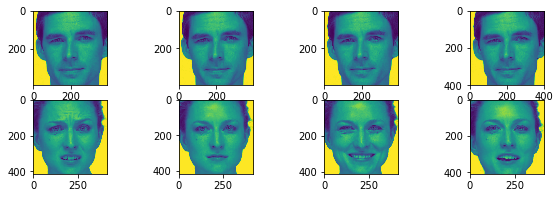

In [38]:
plt.figure(figsize=(10,3))
for i in range(1,5):
    plt.subplot(2, 4, i)
    i_pic = random.randint(0,len(pics_b))
    plt.imshow(pics_a[i_pic])
    
    plt.subplot(2,4,4+i)
    plt.imshow(pics_b[i_pic])
plt.show()

In [39]:
pics_a = resize_pics(pics_a)
pics_b = resize_pics(pics_b)

In [40]:
pics_a.shape, pics_b.shape

((502, 100, 100), (502, 100, 100))

In [41]:
Xa = pics_a / 255.
Xb = pics_b / 255.

In [44]:
def mat2flat(pics):
    return pics.reshape((len(pics), DIM*DIM))
def flat2mat(pics):
    return pics.reshape((len(pics), DIM, DIM))

In [45]:
Xa = mat2flat(Xa)
Xb = mat2flat(Xb)

In [47]:
Xa.shape,Xb.shape

((502, 10000), (502, 10000))

# Dense Network

In [48]:
train_xa, test_xa = Xa[0:int(len(Xa)*0.9)], Xa[int(len(Xa)*0.9):]
train_xb, test_xb = Xb[0:int(len(Xb)*0.9)], Xb[int(len(Xb)*0.9):]

In [50]:
input_layer = l.Input(shape = (DIM * DIM,))
encoded = l.Dense(32, activation='relu')(input_layer)
decoded_a = l.Dense(DIM*DIM, activation = "sigmoid")(encoded)
decoded_b = l.Dense(DIM*DIM, activation = "sigmoid")(encoded)
autoencodeur_a = k.Model(input_layer, decoded_a)
autoencodeur_b = k.Model(input_layer, decoded_b)
encodeur = k.Model(input_layer, encod)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [51]:
autoencodeur_a.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencodeur_b.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [52]:
for _ in range(50):
    autoencodeur_a.fit(train_xa, train_xa, epochs=1)
    autoencodeur_b.fit(train_xb, train_xb, epochs=1)


Epoch 1/1
451/451 [==============================] - 1s 3ms/step - loss: 0.6928
Epoch 1/1
451/451 [==============================] - 0s 940us/step - loss: 0.6926
Epoch 1/1
451/451 [==============================] - 0s 278us/step - loss: 0.6901
Epoch 1/1
451/451 [==============================] - 0s 255us/step - loss: 0.6863
Epoch 1/1
451/451 [==============================] - 0s 302us/step - loss: 0.6689
Epoch 1/1
451/451 [==============================] - 0s 229us/step - loss: 0.6431
Epoch 1/1
451/451 [==============================] - 0s 278us/step - loss: 0.6062
Epoch 1/1
451/451 [==============================] - 0s 260us/step - loss: 0.5829
Epoch 1/1
451/451 [==============================] - 0s 263us/step - loss: 0.5706
Epoch 1/1
451/451 [==============================] - 0s 275us/step - loss: 0.5688
Epoch 1/1
451/451 [==============================] - 0s 331us/step - loss: 0.5647
Epoch 1/1
451/451 [==============================] - 0s 310us/step - loss: 0.5668
Epoch 1/1
451/451

451/451 [==============================] - 0s 355us/step - loss: 0.5592
Epoch 1/1
451/451 [==============================] - 0s 283us/step - loss: 0.5553
Epoch 1/1
451/451 [==============================] - 0s 261us/step - loss: 0.5588


In [102]:
autoencodeur.evaluate(test_x, test_x)

7260/7260 [==============================] - 1s 165us/step


0.5438415253786345

In [104]:
test_img = test_x[500]

pred = autoencodeur.predict(np.array([test_img]))

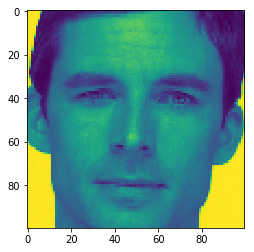

In [105]:
plt.imshow(test_img.reshape((100,100)))


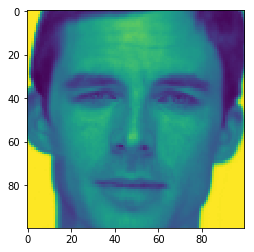

In [106]:
plt.imshow(pred.reshape((100,100)))

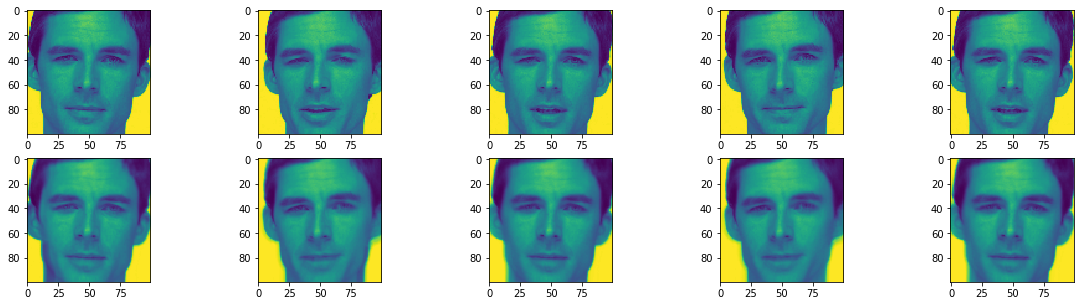

In [108]:
plt.figure(figsize=(20,5))
for i in range(1,6):
    plt.subplot(2, 5, i)
    i_pic = random.randint(0,len(test_x))
    plt.imshow(test_x[i_pic].reshape((100,100)))
    
    plt.subplot(2,5, i+5)
    pred = autoencodeur.predict(np.array([test_x[i_pic]]))
    plt.imshow(pred.reshape((100,100)))
    
plt.show()

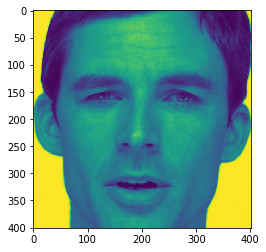

In [85]:
plt.imshow(pics[1000])